In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# 実装

https://qiita.com/ctgk/items/794ae32e9f9f154435ee 参照。


PRML：　分散パラメタ関係 

-> 分散が小さいと系列が相関を持ってしまう。

-> 分散が大きいと棄却する確率が高くなる。


In [26]:
class MetroPolis():
    
    def __init__(self, random_var = 2,thin= 10):
        
        # 正規乱数の分散
        self.random_var = random_var
        
        # まびく間隔
        self.thin = thin
        
        # 初期値
        self.param = 10
    
        
    def __call__(self, func, chain = 3, iter_len = 20000, burn_in = 100):      
        
        self.result  = []
        for _c in range(0, chain + 1):
            self.result.append(self._sampling(func,iter_len, burn_in))
            
        return np.array(self.result)
            
    
    
    def _sampling(self,func,iter_len,burn_in):
        samples = []
        for i in range(iter_len):
            prob_dense = func(self.param)
            new_param = self.param +np.random.normal(loc= 0,scale=self.random_var)
            new_prob_dense = func(new_param)
            accept_prob = new_prob_dense/prob_dense
            if accept_prob > np.random.uniform(low=0.0, high=1.0):
                self.param = new_param
            if i%self.thin ==1:
                samples.append(self.param)

        return samples[burn_in:]
    def get_r_hat(self):
        result = np.array(self.result)

        # 全体平均
        overall_ave = np.mean(result.flatten())
        # 各列の平均
        np.mean(result, axis = 1)
        # Nの数
        N = np.array([i.shape[0] for i in result])
        # Mの数
        M = result.shape[0]
        # Bの計算
        B=  np.sum(N *(overall_ave - np.mean(result, axis = 1))**2)* 1/(M-1) 
        # サンプル内分散
        s = np.sum((result-np.mean(result.reshape(1,-1), axis = 1))**2, axis = 1) * 1/(N-1)
        # Wの計算
        W= 1/M * np.sum(s)
        n = N[0]
        var_hat = (n-1)/n * W + 1/n * B

        return (var_hat/W)**0.5



    

# 既知の分布からのサンプリング

In [27]:
mus = 5
sigmas = 1

def pgauss(x):
    return norm.pdf(x=x, loc=mus, scale=sigmas)


In [28]:
pgauss(5)

0.3989422804014327

In [29]:
mh_sampler = MetroPolis()

array = mh_sampler(pgauss)

# Rhatの計算

In [30]:
result = array

# 全体平均
overall_ave = np.mean(result.flatten())
# 各列の平均
np.mean(result, axis = 1)
# Nの数
N = np.array([i.shape[0] for i in result])
# Mの数
M = result.shape[0]
# Bの計算
B=  np.sum(N *(overall_ave - np.mean(result, axis = 1))**2)* 1/(M-1) 
# サンプル内分散
s = np.sum((result-np.mean(result.reshape(1,-1), axis = 1))**2, axis = 1) * 1/(N-1)
# Wの計算
W= 1/M * np.sum(s)
n = N[0]
var_hat = (n-1)/n * W + 1/n * B

(var_hat/W)**0.5

0.99978172778233199

In [31]:
mh_sampler.get_r_hat()

0.44438136424849656

# 結果の可視化

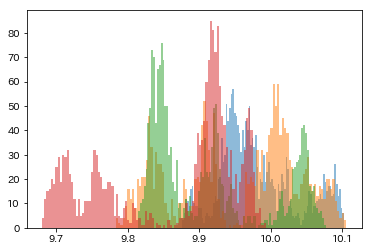

In [24]:
fig, ax = plt.subplots()
for s in array:
    ax.hist(s,alpha=0.5,bins = 100)

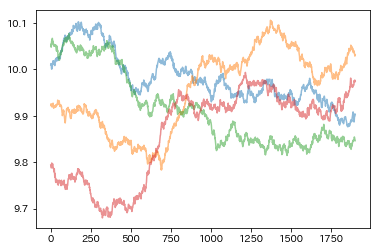

In [25]:
fig, ax = plt.subplots()
for s in array:
    ax.plot(s, alpha = 0.5)
